<a href="https://colab.research.google.com/github/Mansi168/Spotify-Google-Review-NLP/blob/main/Spotify_Google_review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## 📥 Loading the Dataset: SPOTIFY GOOGLE STORE REVIEWS 🎵

In [ ]:
path = "/content/drive/MyDrive/Spotify_google_review/SPOTIFY_REVIEWS.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48


## 🌐 Understanding the dataset

In [ ]:
print(df.head())

   Unnamed: 0                             review_id       pseudo_author_id  \
0           0  14a011a8-7544-47b4-8480-c502af0ac26f  152618553977019693742   
1           1  bfa8876b-470e-4640-83a7-77427f7f37e8  234382942865437071667   
2           2  70e8252f-058a-47d9-b066-df9e1571c970  174473604608358796368   
3           3  672a155a-e81e-4d28-bdeb-a74c031bc072  286593453219054880269   
4           4  bbc1bf95-ed36-41a1-8b98-0f2e314caea5  167276875678680630145   

     author_name                                        review_text  \
0  A Google user                                   Use it every day   
1  A Google user  I enjoy the awesome UI of this app, and it has...   
2  A Google user                Love it! Especially the new design!   
3  A Google user              Awesome UI, best music app out there!   
4  A Google user  As a professional Android developer I'm glad t...   

   review_rating  review_likes author_app_version     review_timestamp  
0              5             1 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377423 entries, 0 to 3377422
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 231.9+ MB


In [ ]:
df.shape

(3377423, 9)

## ⚙️ Preprocessing!

In [ ]:
# null values
df.isnull().sum()

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text              933
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [ ]:
# empty values
df.isna().sum()

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text              933
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [ ]:
#Removing columns that are not required
df = df.drop(['Unnamed: 0','review_id','pseudo_author_id','author_name','author_app_version','review_timestamp','review_likes'], axis=1)

In [ ]:
df.head()

,review_text,review_rating
0,Use it every day,5
1,"I enjoy the awesome UI of this app, and it has...",5
2,Love it! Especially the new design!,5
3,"Awesome UI, best music app out there!",5
4,As a professional Android developer I'm glad t...,5


In [ ]:
df.isna().sum()

review_text      933
review_rating      0
dtype: int64

In [ ]:
# dropping empty values since there are only thousands of that
df=df.dropna()

In [ ]:
df.isna().sum()

review_text      0
review_rating    0
dtype: int64

In [ ]:
df.shape

(3376490, 2)

In [ ]:
#distribution of ratings
df['review_rating'].value_counts()

5    2185054
1     530819
4     348781
3     178511
2     133324
0          1
Name: review_rating, dtype: int64

In [ ]:
def ratingFunc(review_rating):
  if review_rating >= 4:
    return 'Positive'
  elif review_rating <= 2:
    return 'Negative'
  else:
    return 'Neutral'

df['rating_sentiment'] = df['review_rating'].apply(ratingFunc)


In [ ]:
df.head(10)

,review_text,review_rating,rating_sentiment
0,Use it every day,5,Positive
1,"I enjoy the awesome UI of this app, and it has...",5,Positive
2,Love it! Especially the new design!,5,Positive
3,"Awesome UI, best music app out there!",5,Positive
4,As a professional Android developer I'm glad t...,5,Positive
5,If I had to put a $ amount on how much I would...,5,Positive
6,Connection breaks all the time in some areas,3,Neutral
7,Good,5,Positive
8,Easy to search and discover new music and also...,5,Positive
9,All you need for a music fan!,5,Positive


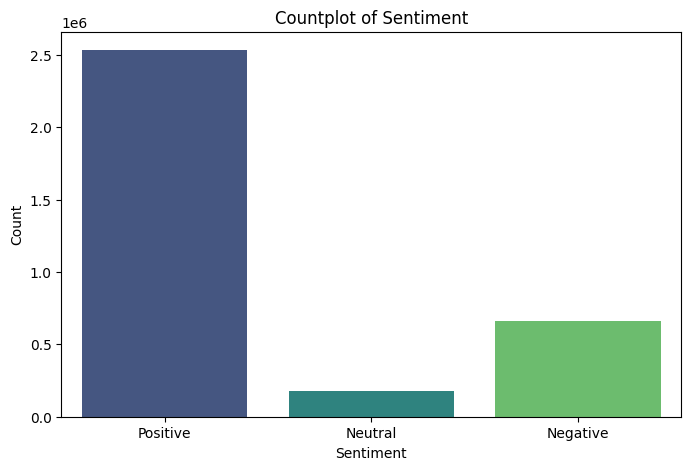

In [ ]:
#Plotting counts of rating_sentiment classes for visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='rating_sentiment', data=df, palette='viridis')
plt.title('Countplot of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 🧹Text cleaning

In [ ]:
#selecting any random review
df['review_text'][2634930]

"The app logged me and out and will not let me log back in. I've deleted and reinstalled the app twice now and nothing changes"

In [ ]:
# text cleaning function
def text_cleaning(text):
  #converting text to lowercase
  text = text.lower()
  # remove texts in between square brackets
  text = re.sub(r'\[.*?\]', '', text)
  # remove punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  # remove digits from string
  text = re.sub('\w*\d\w*', '', text)
  # remove single quotes, double quotes and ellipsis
  text = re.sub('[\'"…]', ' ', text)
  # remove newline characters
  text = re.sub('\n', ' ', text)
  # remove whitespaces
  text = re.sub(r'\s+', ' ', text)
  # remove whitespaces from around alphabets and words
  text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
  # removing stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('', text)
  return text


In [ ]:
df['review_text'] = df['review_text'].apply(lambda x: text_cleaning(x))

In [ ]:
df['review_text'][2634930]

'app logged let log back deleted reinstalled app twice nothing changes'

# Sentiment Analysis using Transformers library

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
# Initialise the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
df = df.iloc[:10000]

NameError: ignored

In [ ]:
df['sentiment'] = df['review_text'].apply(lambda x: sentiment_pipeline(x))
df[['review_text', 'sentiment']].head()

In [ ]:
model_pipeline = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion")
df['sentiment'] = df['review_text'].apply(lambda x: model_pipeline(x))
df[['review_text', 'sentiment']].head()